In [ ]:
# Install ta-lib library for Technical indicators
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   1006      0 --:--:-- --:--:-- --:--:--  1007
100   347  100   347    0     0    468      0 --:--:-- --:--:-- --:--:--     0
100 1299k  100 1299k    0     0  1515k      0 --:--:-- --:--:-- --:--:-- 1515k
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

In [ ]:
!pip uninstall numpy
!pip install numpy==1.23.0

import seaborn as sns

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.23.5.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.23.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 24.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipa

In [ ]:
import datetime as dt
from matplotlib import pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd

In [ ]:
# read companies stock data inserting needed ticker value 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'META', 'TSLA', 'BRK-B', 'LLY', 'V'

company_ticker = "MSFT"
yf.pdr_override()
start = dt.datetime(2012,1,1)
end = dt.datetime(2023,11,30)
df = pdr.get_data_yahoo(company_ticker, start, end)
df.columns

[*********************100%%**********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# preprocess data
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.Volume /= 1e3
df.columns = ['open', 'high', 'low', 'close', 'volume']


<ipython-input-48-581eb52e85dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Volume /= 1e3


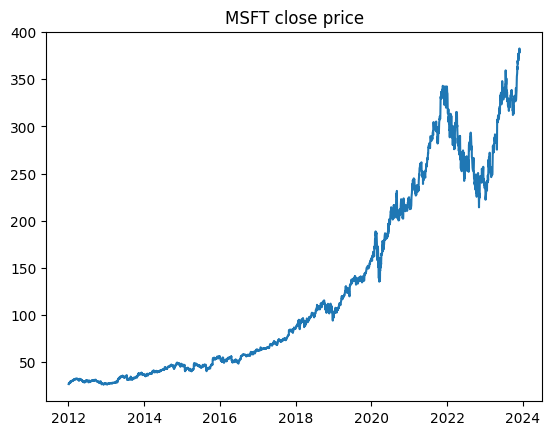

In [ ]:
plt.plot(df.close)
plt.title(f'{company_ticker} close price')
plt.show()

In [ ]:
# create attributes

# add price time lags
lags = [1, 2, 3, 4, 5, 10, 21, 42, 63]
for i in lags:
  df["lag_{}".format(i)] = df.close.shift(i)

# add return time lags
for lag in lags:
    df[f'return_{lag}d'] = df.close.pct_change(lag)

# add technical indicators from talib library
from talib import RSI, BBANDS, MACD, ATR, SMA, EMA

# RSI
df['rsi'] =  RSI(df.close, timeperiod=14)

#Bollinger Bands
upperband, middleband, lowerband = BBANDS(df.close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
df['bb_high'] = upperband
df['bb_low'] = lowerband

# ATR
df['atr'] = ATR(df.high, df.low, df.close, timeperiod=14)

# MACD
macd, macdsignal, macdhist = MACD(df.close, fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = macd

# SMA
df['sma_10'] = SMA(df.close, timeperiod=30)
df['sma_20'] = SMA(df.close, timeperiod=20)
df['sma_50'] = SMA(df.close, timeperiod=50)

# EMA
df['ema_10'] = EMA(df.close, timeperiod=30)
df['ema_20'] = EMA(df.close, timeperiod=30)
df['ema_50'] = EMA(df.close, timeperiod=50)

# add weekday categorical attributes
df['weekday'] = df.index.get_level_values('Date').weekday
df = pd.get_dummies(df, columns=['weekday'],
                        prefix=['weekday'],
                        prefix_sep=['_'],
                        drop_first=False)

# add month categorical attributes
df['month'] = df.index.get_level_values('Date').month
df = pd.get_dummies(df,columns=['month'],
                    prefix=['month'],
                    prefix_sep=['_'],drop_first=False)

In [ ]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'lag_1', 'lag_2', 'lag_3',
       'lag_4', 'lag_5', 'lag_10', 'lag_21', 'lag_42', 'lag_63', 'return_1d',
       'return_2d', 'return_3d', 'return_4d', 'return_5d', 'return_10d',
       'return_21d', 'return_42d', 'return_63d', 'rsi', 'bb_high', 'bb_low',
       'atr', 'macd', 'sma_10', 'sma_20', 'sma_50', 'ema_10', 'ema_20',
       'ema_50', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [ ]:
# create target variables

# for regression task
# create target variable for price prediction by shifting next day's close price one day back
df['target_close'] = df.close.shift(-1)

# create target variable for 1 day return prediction by shifting next day's 1 day return value one day back
df['target_return_1d'] = df.return_1d.shift(-1)

# for classification task
df['target_class'] = df.close-df.open
df['target_class'] = df.target_class.shift(-1)
df['target_class'] = [1 if df['target_class'][i] > 0 else 0 for i in range(len(df))]

In [ ]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'lag_1', 'lag_2', 'lag_3',
       'lag_4', 'lag_5', 'lag_10', 'lag_21', 'lag_42', 'lag_63', 'return_1d',
       'return_2d', 'return_3d', 'return_4d', 'return_5d', 'return_10d',
       'return_21d', 'return_42d', 'return_63d', 'rsi', 'bb_high', 'bb_low',
       'atr', 'macd', 'sma_10', 'sma_20', 'sma_50', 'ema_10', 'ema_20',
       'ema_50', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'target_close', 'target_return_1d', 'target_class'],
      dtype='object')

In [ ]:
df[['target_close', 'target_return_1d', 'target_class']]

,target_close,target_return_1d,target_class
Date,,,
2012-01-03,27.400000,0.023534,1
2012-01-04,27.680000,0.010219,1
2012-01-05,28.110001,0.015535,1
2012-01-06,27.740000,-0.013163,0
2012-01-09,27.840000,0.003605,0
...,...,...,...
2023-11-22,377.429993,-0.001112,1
2023-11-24,378.609985,0.003126,1
2023-11-27,382.700012,0.010803,1


array([[<Axes: title={'center': 'target_close'}>]], dtype=object)

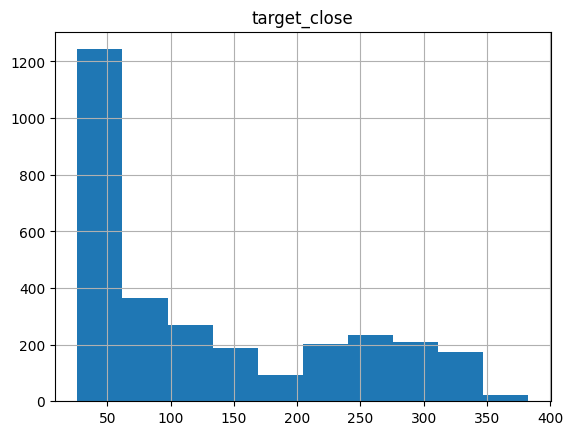

In [ ]:
# check tagret variable distribution
df[['target_close']].hist()

array([[<Axes: title={'center': 'target_return_1d'}>]], dtype=object)

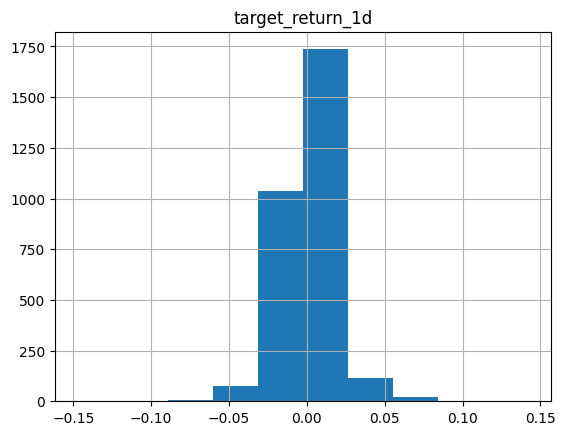

In [ ]:
df[['target_return_1d']].hist()

array([[<Axes: title={'center': 'target_class'}>]], dtype=object)

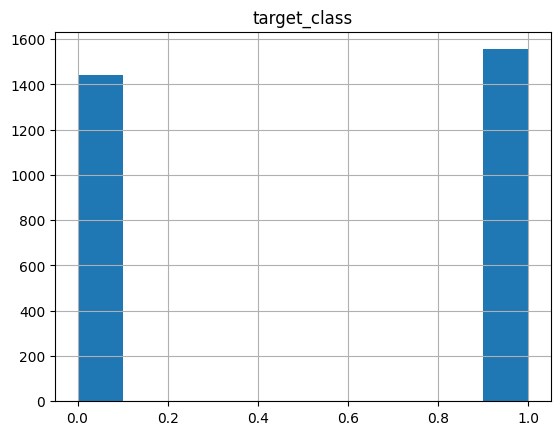

In [ ]:
df[['target_class']].hist()

In [ ]:
# get rid of rows with NA values as they were created while shifting data
df = df.dropna(axis=0)

# show statistical properties of all cloumns
df.describe()

,open,high,low,close,volume,lag_1,lag_2,lag_3,lag_4,lag_5,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,target_close,target_return_1d,target_class
count,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,...,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000
mean,130.382220,131.684282,129.047068,130.427723,32802.100784,130.308251,130.190164,130.072431,129.954579,129.838469,...,0.086942,0.086260,0.091033,0.083191,0.090010,0.083191,0.078759,130.546001,0.000984,0.518582
std,101.051452,102.130325,99.947618,101.082460,16767.424600,100.991230,100.903248,100.816087,100.728338,100.644244,...,0.281798,0.280795,0.287705,0.276218,0.286245,0.276218,0.269408,101.170103,0.016785,0.499740
min,26.379999,26.629999,26.260000,26.370001,7425.600000,26.370001,26.370001,26.370001,26.370001,26.370001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.370001,-0.147390,0.000000
25%,45.669998,46.139999,45.310001,45.660000,22605.700000,45.650002,45.650002,45.650002,45.639999,45.619999,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.730000,-0.006963,0.000000
50%,89.820000,90.989998,88.410004,89.790001,28653.100000,89.709999,89.610001,89.599998,89.470001,89.389999,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.830002,0.000680,1.000000
75%,221.699997,224.000000,218.029999,221.389999,37828.500000,221.149994,221.020004,220.860001,220.100006,219.660004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,221.399994,0.009474,1.000000
max,378.350006,383.000000,378.160004,382.700012,248428.500000,378.609985,377.850006,377.850006,377.440002,377.440002,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,382.700012,0.142169,1.000000


In [ ]:
df.to_csv(f"{company_ticker}_data.csv")

            open      high       low     close    volume
open    1.000000  0.999887  0.999876  0.999731 -0.212246
high    0.999887  1.000000  0.999840  0.999869 -0.208802
low     0.999876  0.999840  1.000000  0.999878 -0.216439
close   0.999731  0.999869  0.999878  1.000000 -0.213075
volume -0.212246 -0.208802 -0.216439 -0.213075  1.000000


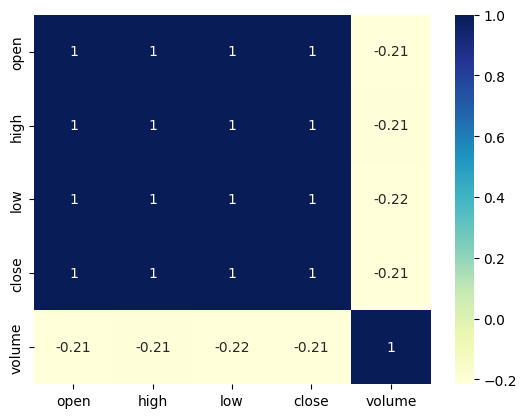

In [ ]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

cols = ['open', 'high', 'low', 'close', 'volume']
print(df[cols].corr())

# plotting correlation heatmap
dataplot = sb.heatmap(df[cols].corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

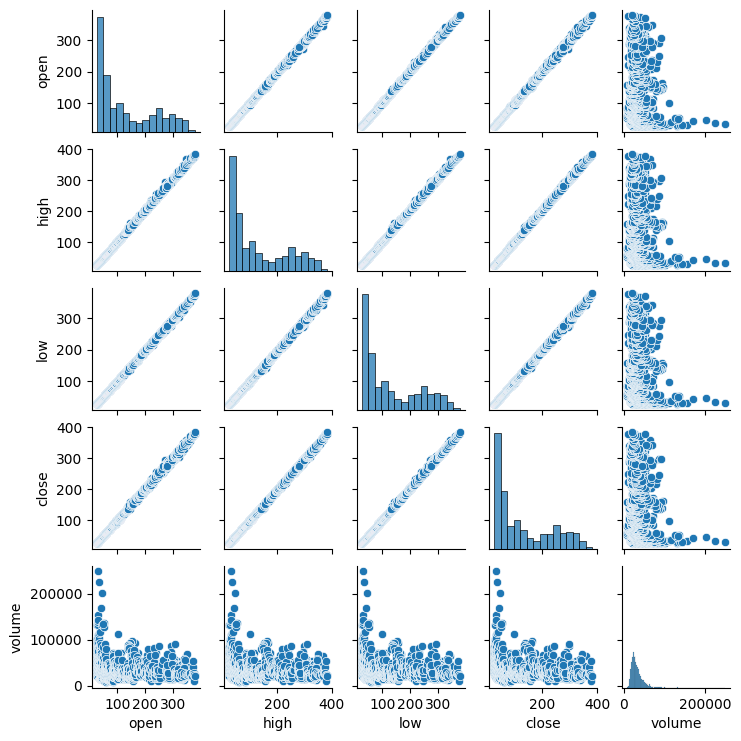

In [ ]:
sns.pairplot(df[cols], height=1.5)

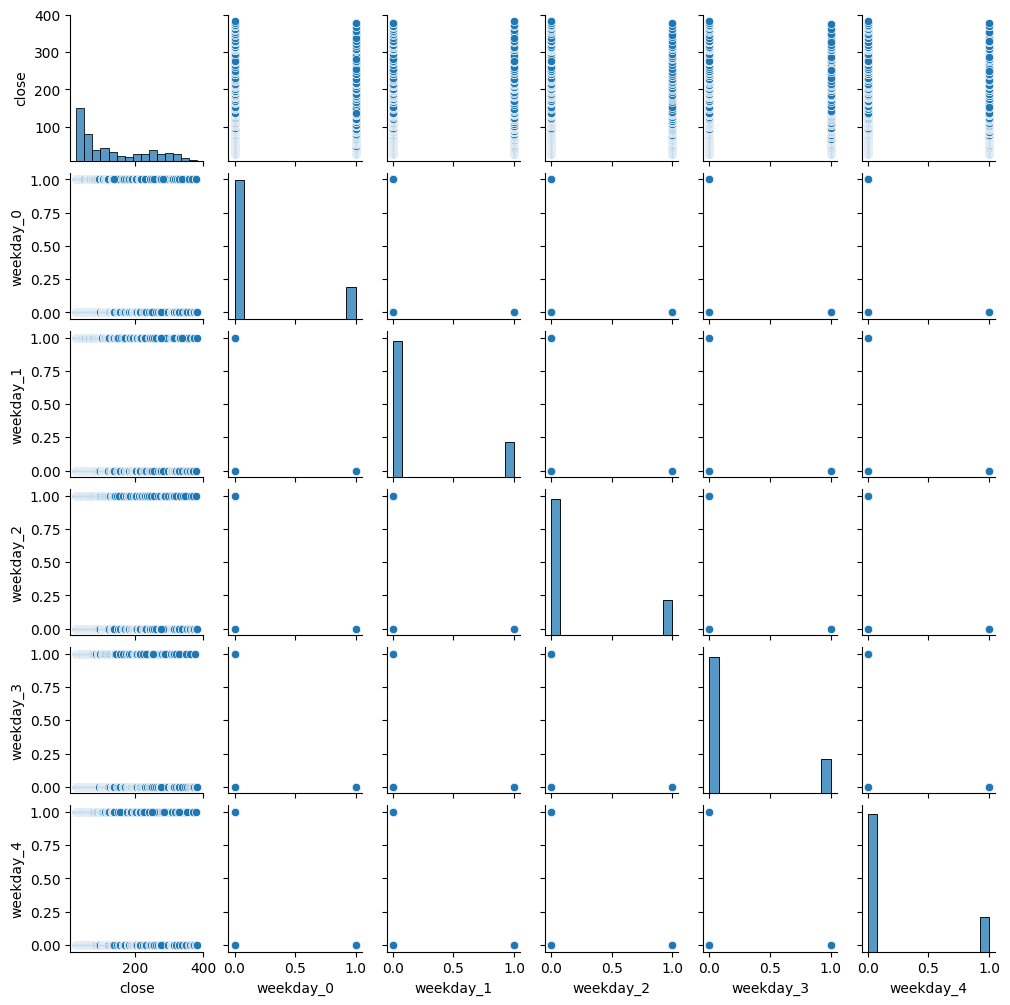

In [ ]:
 cols = ['close', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3','weekday_4']
 sns.pairplot(df[cols], height=1.7)

In [ ]:
df.loc[:, 'rsi_signal'] = pd.cut(df.rsi, bins=[0, 30, 70, 100])
df.groupby('rsi_signal')['target_return_1d'].describe().to_csv('apple_rsi.csv')

In [ ]:
desc = df[cols].describe()
desc.to_csv(f'{company_ticker}_desc.csv')

In [ ]:
df.info

<bound method DataFrame.info of                   open        high         low       close   volume  \
Date                                                                  
2012-04-03   32.160000   32.189999   31.660000   31.940001  42752.1   
2012-04-04   31.660000   31.690001   31.049999   31.209999  49455.9   
2012-04-05   31.150000   31.629999   31.049999   31.520000  50368.6   
2012-04-09   31.219999   31.400000   30.969999   31.100000  31056.4   
2012-04-10   31.059999   31.190001   30.299999   30.469999  54131.3   
...                ...         ...         ...         ...      ...   
2023-11-21  375.670013  376.220001  371.119995  373.070007  28423.1   
2023-11-22  378.000000  379.790009  374.970001  377.850006  23345.3   
2023-11-24  377.329987  377.970001  375.140015  377.429993  10176.6   
2023-11-27  376.779999  380.640015  376.200012  378.609985  22179.2   
2023-11-28  378.350006  383.000000  378.160004  382.700012  20453.1   

                 lag_1       lag_2       lag

In [ ]:
Fold 0:
  Train starts 2012-04-03 00:00:00 and ends 2013-07-31 00:00:00 with 333 observations
  Test starts 2013-08-01 00:00:00 and ends 2014-08-12 00:00:00 with 260 observations
Fold 1:
  Train starts 2012-04-03 00:00:00 and ends 2014-08-12 00:00:00 with 593 observations
  Test starts 2014-08-13 00:00:00 and ends 2015-08-24 00:00:00 with 260 observations
Fold 2:
  Train starts 2012-04-03 00:00:00 and ends 2015-08-24 00:00:00 with 853 observations
  Test starts 2015-08-25 00:00:00 and ends 2016-09-02 00:00:00 with 260 observations
Fold 3:
  Train starts 2012-04-03 00:00:00 and ends 2016-09-02 00:00:00 with 1113 observations
  Test starts 2016-09-06 00:00:00 and ends 2017-09-15 00:00:00 with 260 observations
Fold 4:
  Train starts 2012-04-03 00:00:00 and ends 2017-09-15 00:00:00 with 1373 observations
  Test starts 2017-09-18 00:00:00 and ends 2018-09-27 00:00:00 with 260 observations
Fold 5:
  Train starts 2012-04-03 00:00:00 and ends 2018-09-27 00:00:00 with 1633 observations
  Test starts 2018-09-28 00:00:00 and ends 2019-10-10 00:00:00 with 260 observations
Fold 6:
  Train starts 2012-04-03 00:00:00 and ends 2019-10-10 00:00:00 with 1893 observations
  Test starts 2019-10-11 00:00:00 and ends 2020-10-21 00:00:00 with 260 observations
Fold 7:
  Train starts 2012-04-03 00:00:00 and ends 2020-10-21 00:00:00 with 2153 observations
  Test starts 2020-10-22 00:00:00 and ends 2021-11-02 00:00:00 with 260 observations
Fold 8:
  Train starts 2012-04-03 00:00:00 and ends 2021-11-02 00:00:00 with 2413 observations
  Test starts 2021-11-03 00:00:00 and ends 2022-11-14 00:00:00 with 260 observations

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-66-1cbc81e03ba3>, line 2)

<Axes: >

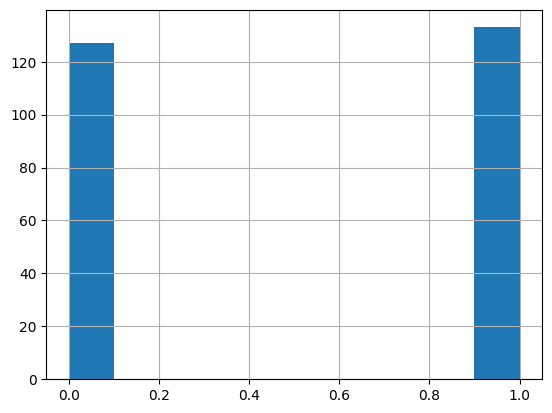

In [ ]:
folds = []
df.target_class['2013-08-01':'2014-08-12'].hist()

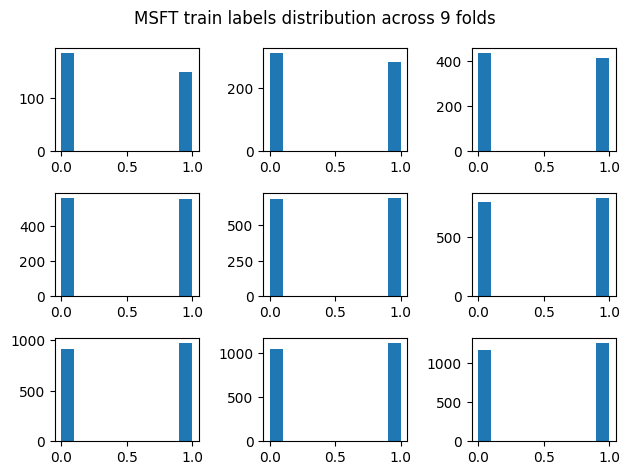

In [ ]:
# Create a figure with 3 rows and 3 columns of subplots
fig, axes = plt.subplots(3, 3)
fig.suptitle(f'{company_ticker} train labels distribution across 9 folds')
axes[0][0].hist(df.target_class['2012-04-03':'2013-07-31'])
axes[0][1].hist(df.target_class['2012-04-03':'2014-08-12'])
axes[0][2].hist(df.target_class['2012-04-03':'2015-08-24'])
axes[1][0].hist(df.target_class['2012-04-03':'2016-09-02'])
axes[1][1].hist(df.target_class['2012-04-03':'2017-09-15'])
axes[1][2].hist(df.target_class['2012-04-03':'2018-09-27'])
axes[2][0].hist(df.target_class['2012-04-03':'2019-10-10'])
axes[2][1].hist(df.target_class['2012-04-03':'2020-10-21'])
axes[2][2].hist(df.target_class['2012-04-03':'2021-11-02'])

plt.tight_layout()
plt.show()

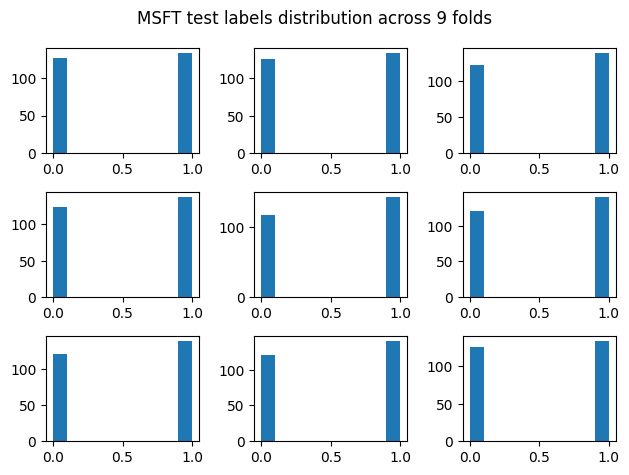

In [ ]:
fig, axes = plt.subplots(3, 3)
fig.suptitle(f'{company_ticker} test labels distribution across 9 folds')
axes[0][0].hist(df.target_class['2013-08-01':'2014-08-12'])
axes[0][1].hist(df.target_class['2014-08-13':'2015-08-24'])
axes[0][2].hist(df.target_class['2015-08-25':'2016-09-02'])
axes[1][0].hist(df.target_class['2016-09-06':'2017-09-15'])
axes[1][1].hist(df.target_class['2017-09-18':'2018-09-27'])
axes[1][2].hist(df.target_class['2018-09-28':'2019-10-10'])
axes[2][0].hist(df.target_class['2019-10-11':'2020-10-21'])
axes[2][1].hist(df.target_class['2020-10-22':'2021-11-02'])
axes[2][2].hist(df.target_class['2021-11-03':'2022-11-14'])
plt.tight_layout()
plt.show()